In [1]:
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
desemprego = pd.read_csv(r"desemprego.csv", sep=';') #carregando o arquivo de desemprego
inflacao = pd.read_excel(r"ipca.xlsx") # carregando o arquivo de inflacao
desemprego.head() # é possível verificar que o arquivo de desemprego precisa ser limpo antes de ser utilizado
desemprego = desemprego.transpose() #transpondo a matriz de dados

In [3]:
desemprego = desemprego.drop([4, 5], axis=1) # excluindo as duas ultimas colunas
desemprego = desemprego.drop(['Taxa de desocupação', 'Unnamed: 1'], axis=0) # excluindoa as duas primeiras linhas
desemprego.columns = ['Data', 'Homens', 'Mulheres', 'Total'] #nomenado as colunas

In [4]:
desemprego.head() # verificando se deu certo

,Data,Homens,Mulheres,Total
Unnamed: 2,01/03/2002,10.9,15.5,12.9
Unnamed: 3,01/04/2002,10.4,15.2,12.5
Unnamed: 4,01/05/2002,10.2,14.1,11.9
Unnamed: 5,01/06/2002,10,13.6,11.6
Unnamed: 6,01/07/2002,10.2,14.1,11.9


In [5]:
desemprego.info() #vendo os tipos de variaveis

<class 'pandas.core.frame.DataFrame'>
Index: 168 entries, Unnamed: 2 to Unnamed: 169
Data columns (total 4 columns):
Data        168 non-null object
Homens      168 non-null object
Mulheres    168 non-null object
Total       168 non-null object
dtypes: object(4)
memory usage: 3.3+ KB


In [6]:
# temos que convereter as 3 ultimas colunas para integers e a primeira para o tipo de data
desemprego['Homens'] = desemprego['Homens'].astype('float')
desemprego['Mulheres'] = desemprego['Mulheres'].astype('float')
desemprego['Total'] = desemprego['Total'].astype('float')
desemprego['Data'] = pd.to_datetime(desemprego['Data'])
inflacao['Data'] = pd.to_datetime(inflacao['Data'])
desemprego.head()

,Data,Homens,Mulheres,Total
Unnamed: 2,2002-01-03,10.9,15.5,12.9
Unnamed: 3,2002-01-04,10.4,15.2,12.5
Unnamed: 4,2002-01-05,10.2,14.1,11.9
Unnamed: 5,2002-01-06,10.0,13.6,11.6
Unnamed: 6,2002-01-07,10.2,14.1,11.9


In [7]:
# temos agora que juntar os dois data frames, mas antes vamos excluir alguns valores que inflacao tem mais dados
for i in range(0, 86):
    print(str(i) + ',', end = ' ') # usei esse codigo pra gerar os numeros que queria excluir, infelizmente não entendi como fazer isso de uma maneira mais simples
for i in range(253, 291):
    print(str(i) + ',', end = ' ') # mesma coisa
inflacao = inflacao.drop([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85], axis = 0)
inflacao = inflacao.drop([254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290])

0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 

In [8]:
inflacao['total'] = desemprego['Total'].values # agora temos os dados que precisamos e podemos estimar a regressão
inflacao.head()

,Data,Inflacao,total
86,2002-03-01,0.60,12.9
87,2002-04-01,0.80,12.5
88,2002-05-01,0.21,11.9
89,2002-06-01,0.42,11.6
90,2002-07-01,1.19,11.9


In [9]:
reg = smf.ols('Inflacao ~ total', data=inflacao).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Inflacao   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9173
Date:                Tue, 26 Nov 2019   Prob (F-statistic):              0.340
Time:                        09:03:05   Log-Likelihood:                -81.319
No. Observations:                 168   AIC:                             166.6
Df Residuals:                     166   BIC:                             172.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4538      0.105      4.311      0.000       0.246       0.662
total          0.0117      0.012      0.958      0.340      -0.012       0.036
==============================================================================
Omnibus:                      109.305   Durbin-Watson:                   0.552
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              893.300
Skew:                           2.314   Prob(JB):                    1.05e-194
Kurtosis:                      13.305   Cond. No.                         30.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
# fazendo regressão com dados de 2002 a 2008
for i in range(156, 254):
    print(str(i) + ',', end = ' ')
inflacao2 = inflacao.drop([156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253], axis=0)

156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 

In [11]:
reg2 = smf.ols('Inflacao ~ total', data=inflacao2).fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Inflacao   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     1.697
Date:                Tue, 26 Nov 2019   Prob (F-statistic):              0.197
Time:                        09:03:06   Log-Likelihood:                -51.882
No. Observations:                  70   AIC:                             107.8
Df Residuals:                      68   BIC:                             112.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0647      0.496     -0.130      0.897      -1.054       0.925
total          0.0597      0.046      1.303      0.197      -0.032       0.151
==============================================================================
Omnibus:                       55.570   Durbin-Watson:                   0.542
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              249.652
Skew:                           2.407   Prob(JB):                     6.15e-55
Kurtosis:                      10.901   Cond. No.                         87.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
for i in range(87, 157):
    print(str(i) + ',', end = ' ')

inflacao3 = inflacao.drop([86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155], axis=0)
inflacao3.head()

87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 

,Data,Inflacao,total
156,2008-01-01,0.54,8.0
157,2008-02-01,0.49,8.7
158,2008-03-01,0.48,8.6
159,2008-04-01,0.55,8.5
160,2008-05-01,0.79,7.9


In [13]:
reg3 = smf.ols('Inflacao ~ total', data=inflacao3).fit()
reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Inflacao   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.8807
Date:                Tue, 26 Nov 2019   Prob (F-statistic):              0.350
Time:                        09:03:06   Log-Likelihood:                -12.433
No. Observations:                  98   AIC:                             28.87
Df Residuals:                      96   BIC:                             34.04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6671      0.147      4.537      0.000       0.375       0.959
total         -0.0211      0.022     -0.938      0.350      -0.066       0.023
==============================================================================
Omnibus:                        5.080   Durbin-Watson:                   0.621
Prob(Omnibus):                  0.079   Jarque-Bera (JB):                4.398
Skew:                           0.468   Prob(JB):                        0.111
Kurtosis:                       3.447   Cond. No.                         35.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

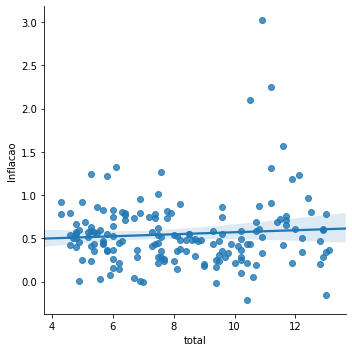

In [14]:
# plotando as estimações
sns.lmplot(x='total', y='Inflacao', data=inflacao)

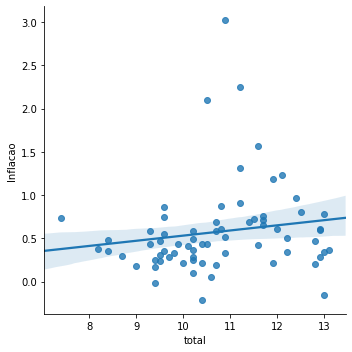

In [15]:
sns.lmplot(x='total', y='Inflacao', data=inflacao2)

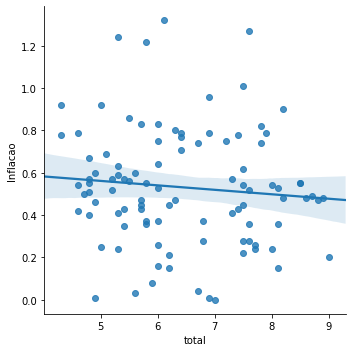

In [16]:
sns.lmplot(x='total', y='Inflacao', data=inflacao3)